# Bland 2020 2D-MOT EEG Comparison

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import pickle
import copy
import time
import collections
import scipy.stats as stats
from tqdm import tqdm

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf, read_raw_brainvision
from mne.time_frequency import tfr_morlet

from joblib import Parallel, delayed

import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt

directory_src = 'D:\\PhD\\NeuroTracker - Paper\\src\\'
directory_data = 'G:\\CDA Datasets\\Bland 2020\\EEG Data - Raw\\'
directory_preproc = 'G:\\CDA Datasets\\Bland 2020\\EEG Data - YR Preproc\\'

# RX - Figure Comparing GA
### Across Subjects x Conditions x Channels x Trials

In [ ]:
mid_channels = ['Fpz', 'Fz', 'FCz', 'Cz', 'CPz', 'Pz', 'POz', 'Oz']

freqs = np.arange(1, 50, 1)
n_cycles = freqs / 2.  # different number of cycle per frequency
 
sep = '\\'
folderpath = directory_data

nb_iterations = len(list(glob.iglob(folderpath + '*.vhdr')))
cur_iteration = 0

# Get ERSP map for each subject and resave the power
pbar = tqdm(total=nb_iterations)
for filepath in glob.iglob(folderpath + '*.vhdr'):
    
    
    filename = filepath[filepath.rfind(sep)+1:]
    print('Processing: ' + filename + '...')

    # 1. -- Load File --
    raw = read_raw_brainvision(filepath, preload=True)

    sfreq = 1000
    raw = raw.resample(sfreq)
    
    events = mne.events_from_annotations(raw)
    
    # ---------- Debug Logs ----------
    frequency = collections.Counter(events[0][:,2])
    events_frequency = dict(frequency)

    print('Max Events in File...')
    print("---------------------------")
    for e in [10,11,20,21]: #set(events[0][:,2]):
        print("{}: \t\t{}".format(e, frequency[e]))
    print("---------------------------")
    # ---------- Debug Logs ----------
    
    epochs = Epochs(raw, events[0], event_id=[11], tmin=-3, tmax=13, baseline=(None, None), preload=True, event_repeated='merge', on_missing='warn')
    
    power = dict()
    cur_power = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, average=False, decim=5, n_jobs=10, verbose=False)
    cur_power = cur_power.apply_baseline((-1,0), mode='logratio', verbose=False)
    power['avg'] = cur_power.data[:,:,:,(cur_power.times >= -1) & (cur_power.times <= 15)].mean(1) # Mean Across Channels.
    for ch in mid_channels:
        power[ch] = cur_power.data[:, cur_power.info.ch_names.index(ch), :, :]
    
    with open(directory_preproc + 'ERSP_1-50Hz\\' + filename[:-5] + '.pkl',"wb") as f:
        pickle.dump(power, f, protocol=pickle.HIGHEST_PROTOCOL)

    del raw
    del epochs
    del power
    del cur_power
    
    pbar.update(1)

pbar.close()

  0%|                                                                                           | 0/41 [00:00<?, ?it/s]

Processing: 0022.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\0022.vhdr...
Setting channel info structure...
Reading 0 ... 11972599  =      0.000 ...  2394.520 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		160
11: 		160
20: 		160
21: 		160
---------------------------
Not setting metadata
160 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 16001 original time points ...
0 bad epochs dropped


  2%|█▉                                                                              | 1/41 [03:31<2:20:53, 211.34s/it]

Processing: 1011.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1011.vhdr...
Setting channel info structure...
Reading 0 ... 16198499  =      0.000 ...  3239.700 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


  5%|███▉                                                                            | 2/41 [08:05<2:41:18, 248.17s/it]

Processing: 1021.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1021.vhdr...
Setting channel info structure...
Reading 0 ... 15851499  =      0.000 ...  3170.300 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		191
11: 		191
20: 		192
21: 		191
---------------------------
Not setting metadata
191 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 191 events and 16001 original time points ...
0 bad epochs dropped


  7%|█████▊                                                                          | 3/41 [13:17<2:55:38, 277.33s/it]

Processing: 1031.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1031.vhdr...
Setting channel info structure...
Reading 0 ... 14365999  =      0.000 ...  2873.200 secs...
Used Annotations descriptions: ['Comment/Buffer Overflow', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		157
11: 		158
20: 		158
21: 		157
---------------------------
Not setting metadata
158 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 158 events and 16001 original time points ...
0 bad epochs dropped


 10%|███████▊                                                                        | 4/41 [17:31<2:45:26, 268.28s/it]

Processing: 1041.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1041.vhdr...
Setting channel info structure...
Reading 0 ... 15957099  =      0.000 ...  3191.420 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 12%|█████████▊                                                                      | 5/41 [22:13<2:43:55, 273.20s/it]

Processing: 1051.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1051.vhdr...
Setting channel info structure...
Reading 0 ... 3386799  =      0.000 ...  3386.799 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 60', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 15%|███████████▋                                                                    | 6/41 [25:26<2:23:29, 245.98s/it]

Processing: 1061.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1061.vhdr...
Setting channel info structure...
Reading 0 ... 3292319  =      0.000 ...  3292.319 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 60', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 17%|█████████████▋                                                                  | 7/41 [28:43<2:10:15, 229.87s/it]

Processing: 1071.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1071.vhdr...
Setting channel info structure...
Reading 0 ... 3086239  =      0.000 ...  3086.239 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 60', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 20%|███████████████▌                                                                | 8/41 [32:00<2:00:44, 219.53s/it]

Processing: 1081.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1081.vhdr...
Setting channel info structure...
Reading 0 ... 3243999  =      0.000 ...  3243.999 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 22%|█████████████████▌                                                              | 9/41 [35:16<1:53:01, 211.93s/it]

Processing: 1101.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1101.vhdr...
Setting channel info structure...
Reading 0 ... 3749579  =      0.000 ...  3749.579 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 24%|███████████████████▎                                                           | 10/41 [38:34<1:47:18, 207.69s/it]

Processing: 1111.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1111.vhdr...
Setting channel info structure...
Reading 0 ... 3324179  =      0.000 ...  3324.179 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 27%|█████████████████████▏                                                         | 11/41 [41:46<1:41:30, 203.02s/it]

Processing: 1121.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1121.vhdr...
Setting channel info structure...
Reading 0 ... 3256419  =      0.000 ...  3256.419 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 29%|███████████████████████                                                        | 12/41 [44:57<1:36:22, 199.39s/it]

Processing: 1131.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1131.vhdr...
Setting channel info structure...
Reading 0 ... 3284599  =      0.000 ...  3284.599 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 32%|█████████████████████████                                                      | 13/41 [48:04<1:31:15, 195.57s/it]

Processing: 1141.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1141.vhdr...
Setting channel info structure...
Reading 0 ... 3076419  =      0.000 ...  3076.419 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 34%|██████████████████████████▉                                                    | 14/41 [51:10<1:26:44, 192.75s/it]

Processing: 1151.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1151.vhdr...
Setting channel info structure...
Reading 0 ... 3284439  =      0.000 ...  3284.439 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 60', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 37%|████████████████████████████▉                                                  | 15/41 [54:20<1:23:05, 191.75s/it]

Processing: 1161.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1161.vhdr...
Setting channel info structure...
Reading 0 ... 3466399  =      0.000 ...  3466.399 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		191
11: 		191
20: 		192
21: 		191
---------------------------
Not setting metadata
191 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 191 events and 16001 original time points ...
0 bad epochs dropped


 39%|██████████████████████████████▊                                                | 16/41 [57:26<1:19:11, 190.04s/it]

Processing: 1171.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1171.vhdr...
Setting channel info structure...
Reading 0 ... 3081039  =      0.000 ...  3081.039 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 41%|███████████████████████████████▉                                             | 17/41 [1:00:31<1:15:28, 188.68s/it]

Processing: 1181.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1181.vhdr...
Setting channel info structure...
Reading 0 ... 3193539  =      0.000 ...  3193.539 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 44%|█████████████████████████████████▊                                           | 18/41 [1:03:59<1:14:29, 194.32s/it]

Processing: 1191.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1191.vhdr...
Setting channel info structure...
Reading 0 ... 3160679  =      0.000 ...  3160.679 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 46%|███████████████████████████████████▋                                         | 19/41 [1:07:21<1:12:05, 196.61s/it]

Processing: 1201.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1201.vhdr...
Setting channel info structure...
Reading 0 ... 3101059  =      0.000 ...  3101.059 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 49%|█████████████████████████████████████▌                                       | 20/41 [1:10:29<1:07:55, 194.08s/it]

Processing: 1211.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1211.vhdr...
Setting channel info structure...
Reading 0 ... 3215699  =      0.000 ...  3215.699 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 60', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 51%|███████████████████████████████████████▍                                     | 21/41 [1:13:39<1:04:15, 192.78s/it]

Processing: 1221.vhdr...
Extracting parameters from G:\CDA Datasets\Bland 2020\EEG Data - Raw\1221.vhdr...
Setting channel info structure...
Reading 0 ... 3157939  =      0.000 ...  3157.939 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 50', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 61', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']
Max Events in File...
---------------------------
10: 		192
11: 		192
20: 		192
21: 		192
---------------------------
Not setting metadata
192 matching events found
Setting baseline interval to [-3.0, 13.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 16001 original time points ...
0 bad epochs dropped


 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [21:34<00:32, 32.15s/it]

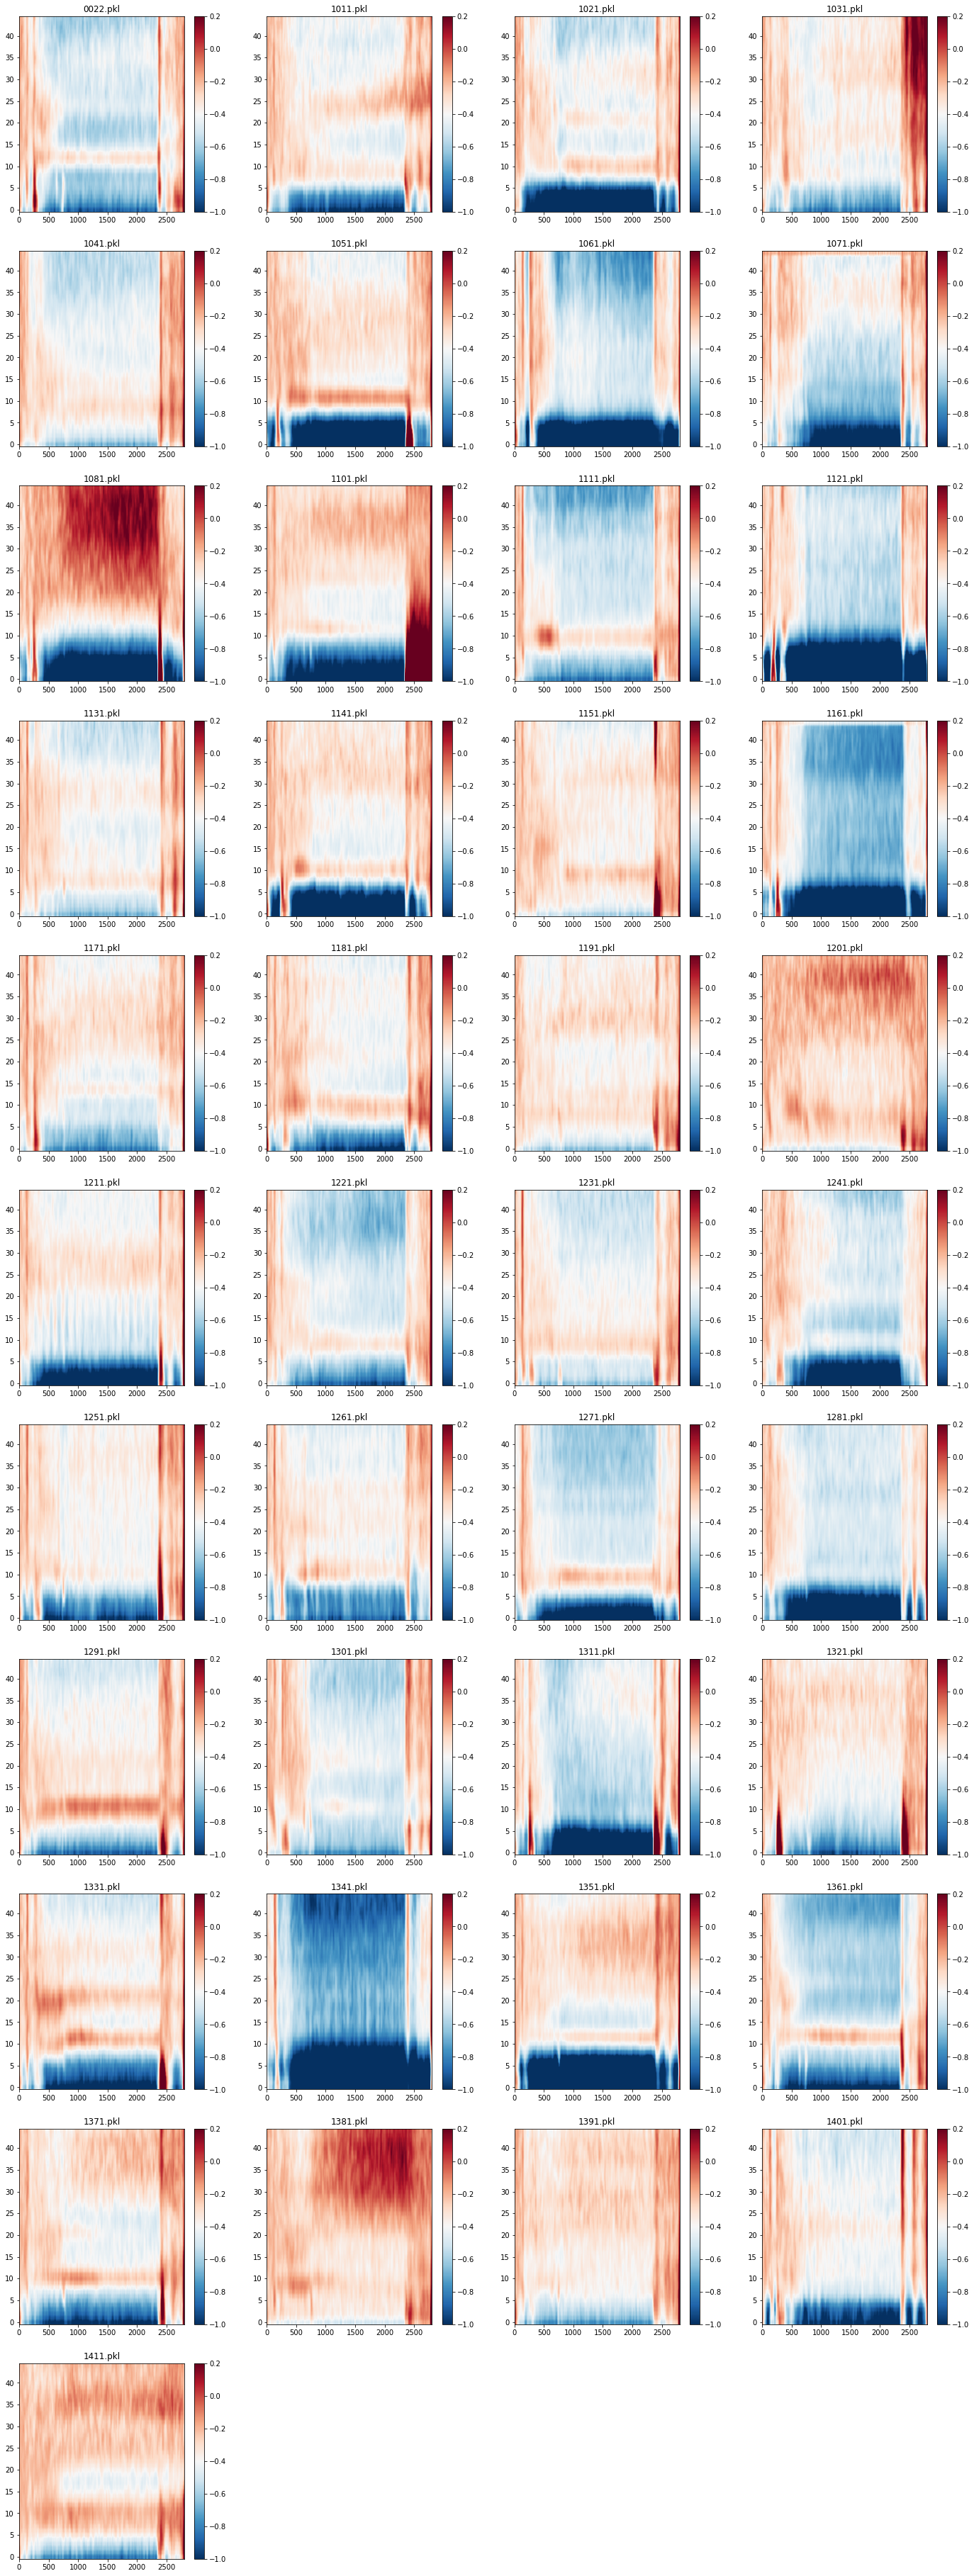

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [21:41<00:31, 31.74s/it]


Shape blratio mean: (49, 2801)
Doing t-tests (49 x 2801)
Done with t-tests! (105.82s)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [2]:
def tf_ttest(p2D, freq, t0_offset):
    pvals = []
    for time in range(p2D.shape[2]):
        summary, pval = stats.ttest_rel(p2D[:, freq, 0:t0_offset].mean(1).flatten(), p2D[:, freq, time].flatten())
        
        pvals.append(pval)
        
    return pvals

# Load times from times files
with open(directory_preproc + 'ERSP_1-50Hz\\Analysis\\times.pkl', "rb") as f:
    times = pickle.load(f)

nb_iterations = len(list(glob.iglob(directory_preproc + 'ERSP_1-50Hz\\*.pkl')))
cur_iteration = 0
pbar = tqdm(total=nb_iterations)

no_participant = 1
plt.figure(figsize=(24, 66))

plot_blratio = dict()
power2D_blratio = []
for filepath in glob.iglob(directory_preproc + 'ERSP_1-50Hz\\*.pkl'):
    filename = filepath[filepath.rfind('\\')+1:]
    #print(f'Loading: {filename}...')
    
    if filename == 'times.pkl':
        continue

    with open(filepath, "rb") as f:
        pickle_data = pickle.load(f)
        power = pickle_data['avg']

    power2D_blratio.append(power)
    
    ax = plt.subplot(11, 4, no_participant)
    z = ax.imshow(power.mean(0)[:-4], aspect='auto', origin='lower', cmap=plt.cm.RdBu_r, vmin=-1, vmax=0.2)
    ax.set_title(filename)
    plt.colorbar(z, ax=ax)

    del pickle_data
    del power

    no_participant = no_participant + 1 
    pbar.update(1)
plt.show()
pbar.close()

power2D_blratio_trials = []
for participant_trials in power2D_blratio:
    for trial in participant_trials:
        power2D_blratio_trials.append(trial)

power2D_blratio_stacked = np.stack(power2D_blratio_trials)
power2D_blratio_mean = np.mean(power2D_blratio_stacked, 0)
power2D_blratio_median = np.median(power2D_blratio_stacked, 0)

print('Shape blratio mean: {}'.format(power2D_blratio_mean.shape))

# re-shape the times, because now working just with arrays, not with 'power' object.
times = times[(times >= -1) & (times <= 15)]
t0_offset = (np.where(times >= 0)[0][0])

print(f'Doing t-tests ({power2D_blratio_stacked.shape[1]} x {power2D_blratio_stacked.shape[2]})')
tic = time.time()
pvalues = Parallel(n_jobs=10)(delayed(tf_ttest)(power2D_blratio_stacked, freq, t0_offset) for freq in range(0, 49))
toc = time.time()
print('Done with t-tests! ({:.2f}s)'.format(toc-tic))

pvalues = np.stack(pvalues)
tmask2D = power2D_blratio_mean.copy()
tmask2D[pvalues > 0.05] = np.nan

ticks_offset = np.where(times >= -1)[0][0]
times_of_interest = [0, 2, 3, 11, 13]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]

fig, axs = plt.subplots(1,3, figsize=(18, 6))

z = axs[0].imshow(power2D_blratio_mean, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.2)
axs[0].set_xticks(ticks_of_interest)
axs[0].set_xticklabels(times_of_interest)
axs[0].set_title(f'Frequency Power vs Baseline (Mean)')
plt.colorbar(z, ax=axs[0])

z = axs[1].imshow(power2D_blratio_median, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.2)
axs[1].set_xticks(ticks_of_interest)
axs[1].set_xticklabels(times_of_interest)
axs[1].set_title(f'Frequency Power vs Baseline (Median)')
plt.colorbar(z, ax=axs[1])

axs[2].imshow(power2D_blratio_mean, cmap=plt.cm.gray, aspect='auto', origin='lower')#, vmin=-1, vmax=0.2)
z = axs[2].imshow(tmask2D, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.2)
axs[2].set_xticks(ticks_of_interest)
axs[2].set_xticklabels(times_of_interest)
axs[2].set_title(f'Frequency Power vs Baseline (t-test mask)')
plt.colorbar(z, ax=axs[2])

plot_blratio['tmask'] = tmask2D
plot_blratio['mean'] = power2D_blratio_mean
plot_blratio['median'] = power2D_blratio_median

plt.show()

data_pickle = dict()
data_pickle['times'] = times
data_pickle['plot_blratio'] = plot_blratio
with open(directory_preproc + 'ERSP_1-50Hz\\Analysis\\GA-MeanMedianMask.pkl', "wb") as f:
    pickle.dump(data_pickle, f, protocol=pickle.HIGHEST_PROTOCOL)

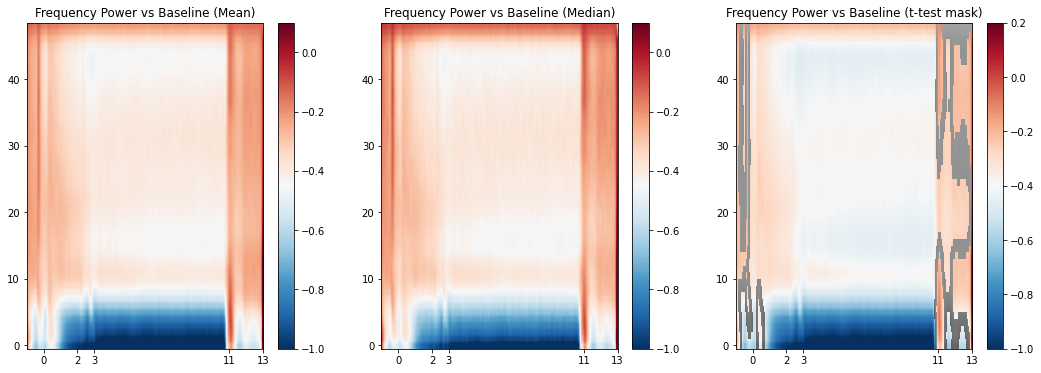

In [5]:
ticks_offset = np.where(times >= -1)[0][0]
times_of_interest = [0, 2, 3, 11, 13]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]

fig, axs = plt.subplots(1,3, figsize=(18, 6))

z = axs[0].imshow(power2D_blratio_mean, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.1)
axs[0].set_xticks(ticks_of_interest)
axs[0].set_xticklabels(times_of_interest)
axs[0].set_title(f'Frequency Power vs Baseline (Mean)')
plt.colorbar(z, ax=axs[0])

z = axs[1].imshow(power2D_blratio_median, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.1)
axs[1].set_xticks(ticks_of_interest)
axs[1].set_xticklabels(times_of_interest)
axs[1].set_title(f'Frequency Power vs Baseline (Median)')
plt.colorbar(z, ax=axs[1])

axs[2].imshow(power2D_blratio_mean, cmap=plt.cm.gray, aspect='auto', origin='lower')#, vmin=-1, vmax=0.2)
z = axs[2].imshow(tmask2D, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.2)
axs[2].set_xticks(ticks_of_interest)
axs[2].set_xticklabels(times_of_interest)
axs[2].set_title(f'Frequency Power vs Baseline (t-test mask)')
plt.colorbar(z, ax=axs[2])

plot_blratio['tmask'] = tmask2D
plot_blratio['mean'] = power2D_blratio_mean
plot_blratio['median'] = power2D_blratio_median

plt.show()

data_pickle = dict()
data_pickle['times'] = times
data_pickle[] = plot_blratio
with open(directory_preproc + 'ERSP_1-50Hz\\Analysis\\GA-MeanMedianMask.pkl', "wb") as f:
    pickle.dump(data_pickle, f, protocol=pickle.HIGHEST_PROTOCOL)

# Channels: Midline Distribution


  0%|                                                                                           | 0/41 [01:08<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [21:36<00:00, 32.73s/it]

<Figure size 1728x2160 with 0 Axes>

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [21:36<00:00, 31.63s/it]


Shape blratio mean: (49, 2801)
Doing t-tests for: Fpz (49 x 2801)
Done with t-tests! (212.14s)


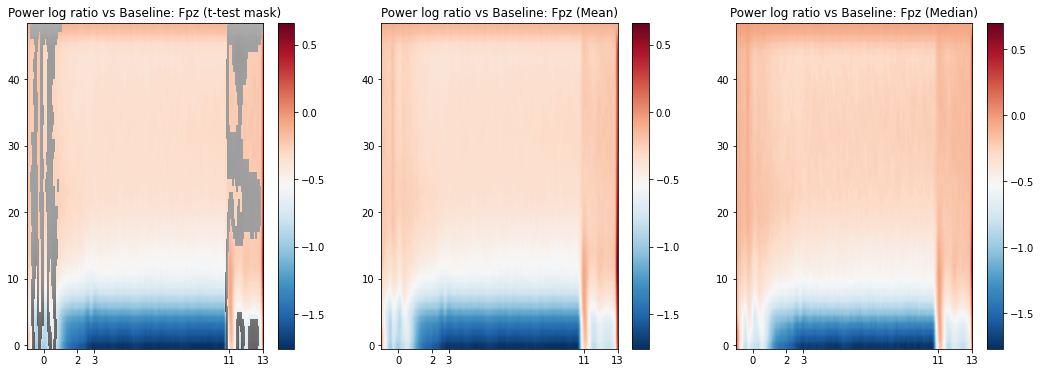

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:01<00:00, 32.77s/it]

<Figure size 1728x2160 with 0 Axes>

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:01<00:00, 32.24s/it]


Shape blratio mean: (49, 2801)
Doing t-tests for: Fz (49 x 2801)
Done with t-tests! (210.37s)


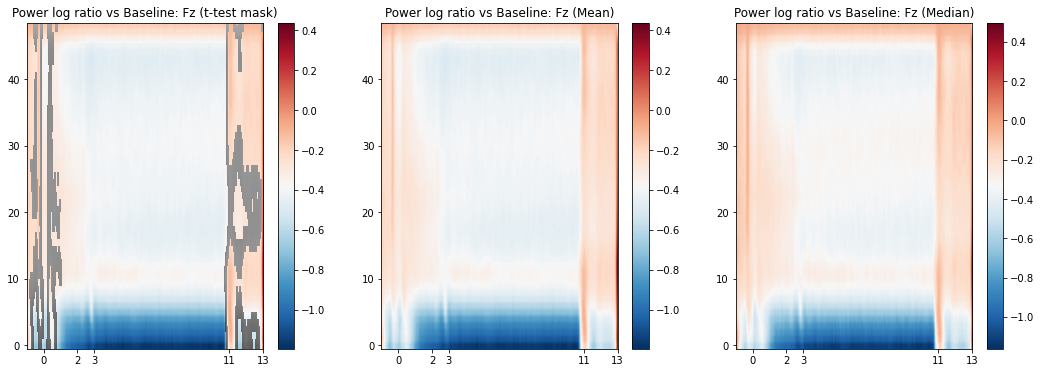

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:00<00:00, 32.74s/it]

<Figure size 1728x2160 with 0 Axes>

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:00<00:00, 32.22s/it]


Shape blratio mean: (49, 2801)
Doing t-tests for: FCz (49 x 2801)
Done with t-tests! (213.28s)


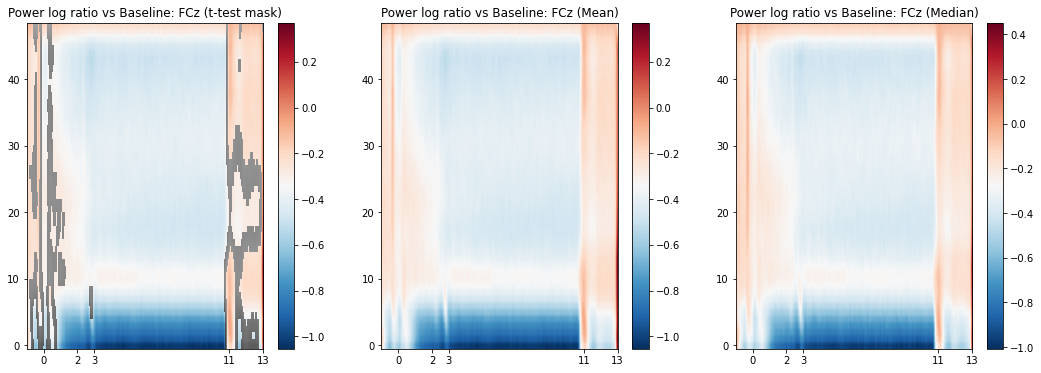

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [21:57<00:00, 32.63s/it]

<Figure size 1728x2160 with 0 Axes>

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [21:57<00:00, 32.14s/it]


Shape blratio mean: (49, 2801)
Doing t-tests for: Cz (49 x 2801)
Done with t-tests! (186.74s)


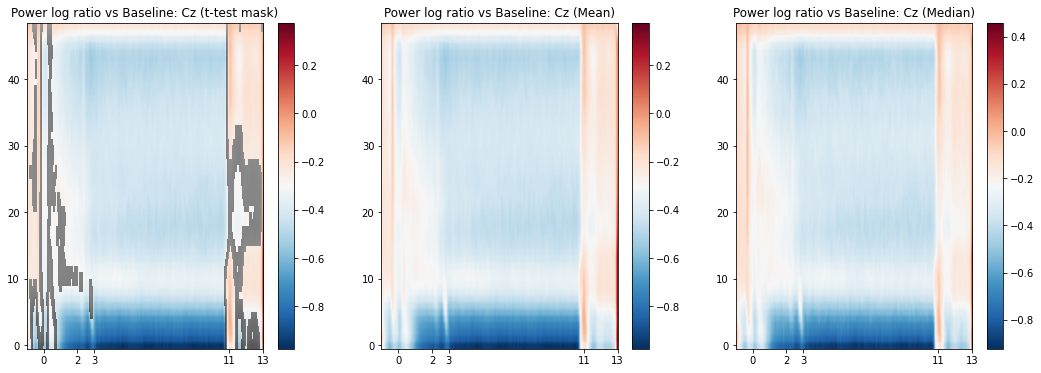

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [21:55<00:00, 32.65s/it]

<Figure size 1728x2160 with 0 Axes>

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [21:55<00:00, 32.09s/it]


Shape blratio mean: (49, 2801)
Doing t-tests for: CPz (49 x 2801)
Done with t-tests! (208.82s)


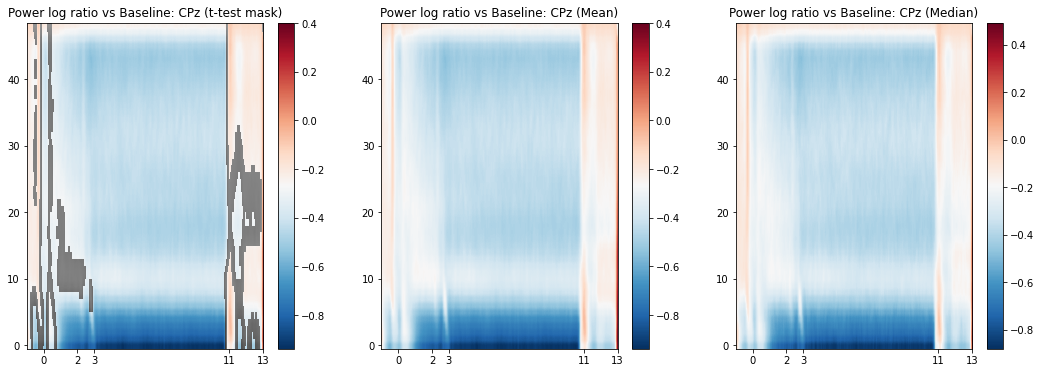

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:00<00:00, 32.74s/it]

<Figure size 1728x2160 with 0 Axes>

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:00<00:00, 32.20s/it]


Shape blratio mean: (49, 2801)
Doing t-tests for: Pz (49 x 2801)
Done with t-tests! (207.73s)


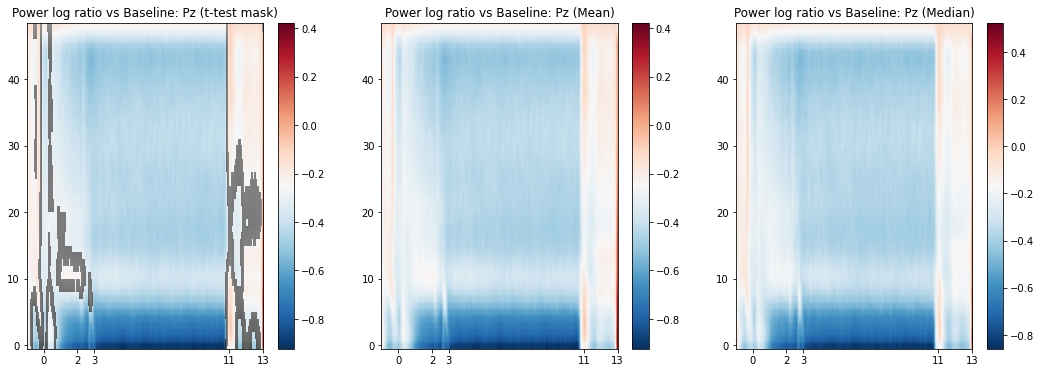

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [21:59<00:00, 32.68s/it]

<Figure size 1728x2160 with 0 Axes>

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [21:59<00:00, 32.19s/it]


Shape blratio mean: (49, 2801)
Doing t-tests for: POz (49 x 2801)
Done with t-tests! (210.36s)


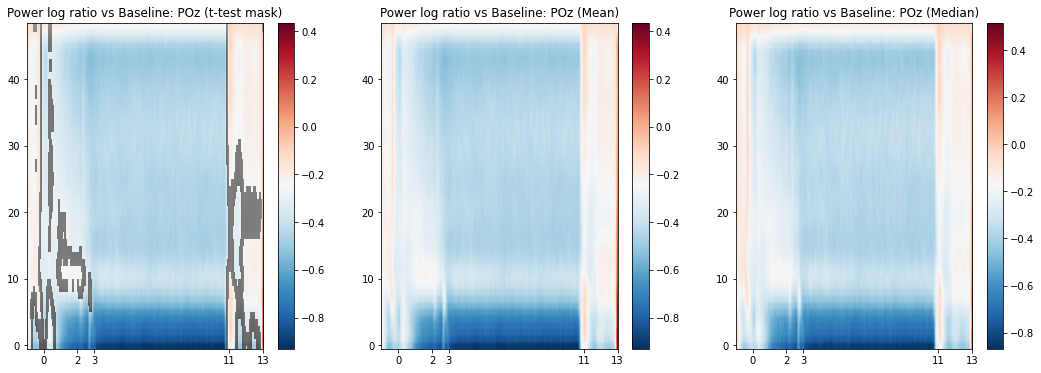

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:00<00:00, 32.76s/it]

<Figure size 1728x2160 with 0 Axes>

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [22:00<00:00, 32.21s/it]


Shape blratio mean: (49, 2801)
Doing t-tests for: Oz (49 x 2801)
Done with t-tests! (210.31s)


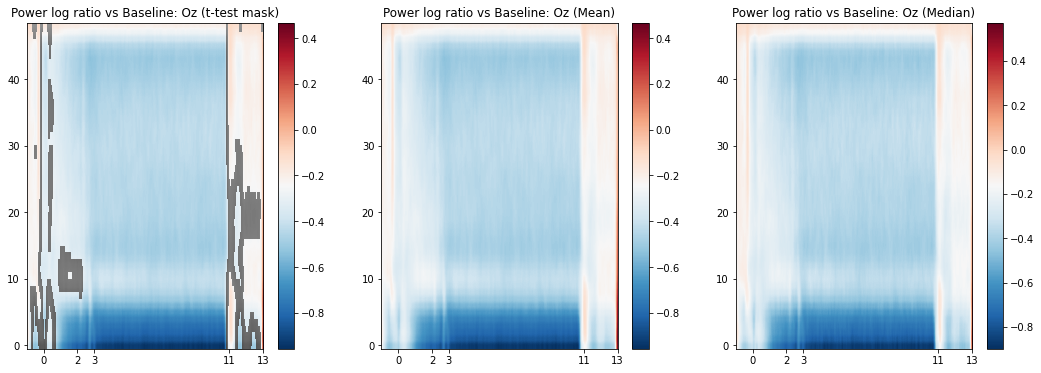

In [37]:
def tf_ttest(p2D, freq):
    pvals = []
    for time in range(p2D.shape[2]):
        summary, pval = stats.ttest_rel(p2D[:, freq, 0:t0_offset].mean(1).flatten(), p2D[:, freq, time].flatten())
        
        pvals.append(pval)
        
    return pvals

with open(directory_preproc + 'ERSP_1-50Hz\\Analysis\\times.pkl', "rb") as f:
    times = pickle.load(f)

mid_channels = [['Fpz', 'Fz'], ['FCz', 'Cz', 'CPz'], ['Pz', 'POz', 'Oz']]
mid_channels_flat = [ch for cluster in mid_channels for ch in cluster]
#mid_channels_flat = ['Cz']
    
# Get ERSP map for subjects for midline channels
for ch in mid_channels_flat:
    plot_blratio = dict()
    power2D_blratio = []

    nb_iterations = len(list(glob.iglob(directory_preproc + 'ERSP_1-50Hz\\*.pkl')))
    cur_iteration = 0
    pbar = tqdm(total=nb_iterations)
    
    no_participant = 1
    plt.figure(figsize=(24,30))
    
    for filepath in glob.iglob(directory_preproc + 'ERSP_1-50Hz\\*.pkl'):
        filename = filepath[filepath.rfind('\\')+1:]
        #print(f'Loading: {filename}...')

        with open(filepath, "rb") as f:
            data_pickle = pickle.load(f)

        cur_power2D_blratio = data_pickle[ch]
        cur_power2D_blratio = cur_power2D_blratio[:,:,(times >= -1) & (times <= 13)]

        power2D_blratio.append(cur_power2D_blratio)

        del data_pickle
        del cur_power2D_blratio

        no_participant = no_participant + 1 
        pbar.update(1)
        
    plt.show()
    pbar.close()
    
    power2D_blratio_trials = []
    for participant_trials in power2D_blratio:
        for trial in participant_trials:
            power2D_blratio_trials.append(trial)

    power2D_blratio_stacked = np.stack(power2D_blratio_trials)
    power2D_blratio_mean = np.mean(power2D_blratio_stacked, 0)
    power2D_blratio_median = np.median(power2D_blratio_stacked, 0)
    print('Shape blratio mean: {}'.format(power2D_blratio_mean.shape))

    # re-shape the times, because now working just with arrays, not with 'power' object.
    #times = times[(times >= -1) & (times <= 13)]
    t0_offset = (np.where(times >= -1)[0][0])

    print(f'Doing t-tests for: {ch} ({power2D_blratio_stacked.shape[1]} x {power2D_blratio_stacked.shape[2]})')
    tic = time.time()
    pvalues = Parallel(n_jobs=8)(delayed(tf_ttest)(power2D_blratio_stacked, freq) for freq in range(0, 49))
    toc = time.time()
    print('Done with t-tests! ({:.2f}s)'.format(toc-tic))

    pvalues = np.stack(pvalues)
    tmask2D = power2D_blratio_mean.copy()
    tmask2D[pvalues > 0.05] = np.nan

    ticks_offset = np.where(times >= -1)[0][0]
    times_of_interest = [0, 2, 3, 11, 13]
    ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]

    fig, axs = plt.subplots(1,3, figsize=(18, 6))
    axs[0].imshow(power2D_blratio_mean, cmap=plt.cm.gray, aspect='auto', origin='lower')#, vmin=-0.7, vmax=0.1)
    z = axs[0].imshow(tmask2D, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower')
    axs[0].set_xticks(ticks_of_interest)
    axs[0].set_xticklabels(times_of_interest)
    axs[0].set_title(f'Power log ratio vs Baseline: {ch} (t-test mask)')
    plt.colorbar(z, ax=axs[0])
    
    z = axs[1].imshow(power2D_blratio_mean, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower')#, vmin=-0.7, vmax=0.1)
    axs[1].set_xticks(ticks_of_interest)
    axs[1].set_xticklabels(times_of_interest)
    axs[1].set_title(f'Power log ratio vs Baseline: {ch} (Mean)')
    plt.colorbar(z, ax=axs[1])
    
    z = axs[2].imshow(power2D_blratio_median, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower')#, vmin=-0.7, vmax=0.1)
    axs[2].set_xticks(ticks_of_interest)
    axs[2].set_xticklabels(times_of_interest)
    axs[2].set_title(f'Power log ratio vs Baseline: {ch} (Median)')
    plt.colorbar(z, ax=axs[2])
    
    plot_blratio['tmask'] = tmask2D
    plot_blratio['mean'] = power2D_blratio_mean
    plot_blratio['median'] = power2D_blratio_median
    
    plt.show()

    data_pickle = dict()
    data_pickle['times'] = times
    data_pickle['plot_blratio'] = plot_blratio
    with open(directory_preproc + f'ERSP_1-50Hz\\Analysis\\MidLine-MeanMedianMask-{ch}.pkl', "wb") as f:
        pickle.dump(data_pickle, f, protocol=pickle.HIGHEST_PROTOCOL)
        
    del data_pickle
    del plot_blratio
    del tmask2D
    del power2D_blratio_mean
    del power2D_blratio_median


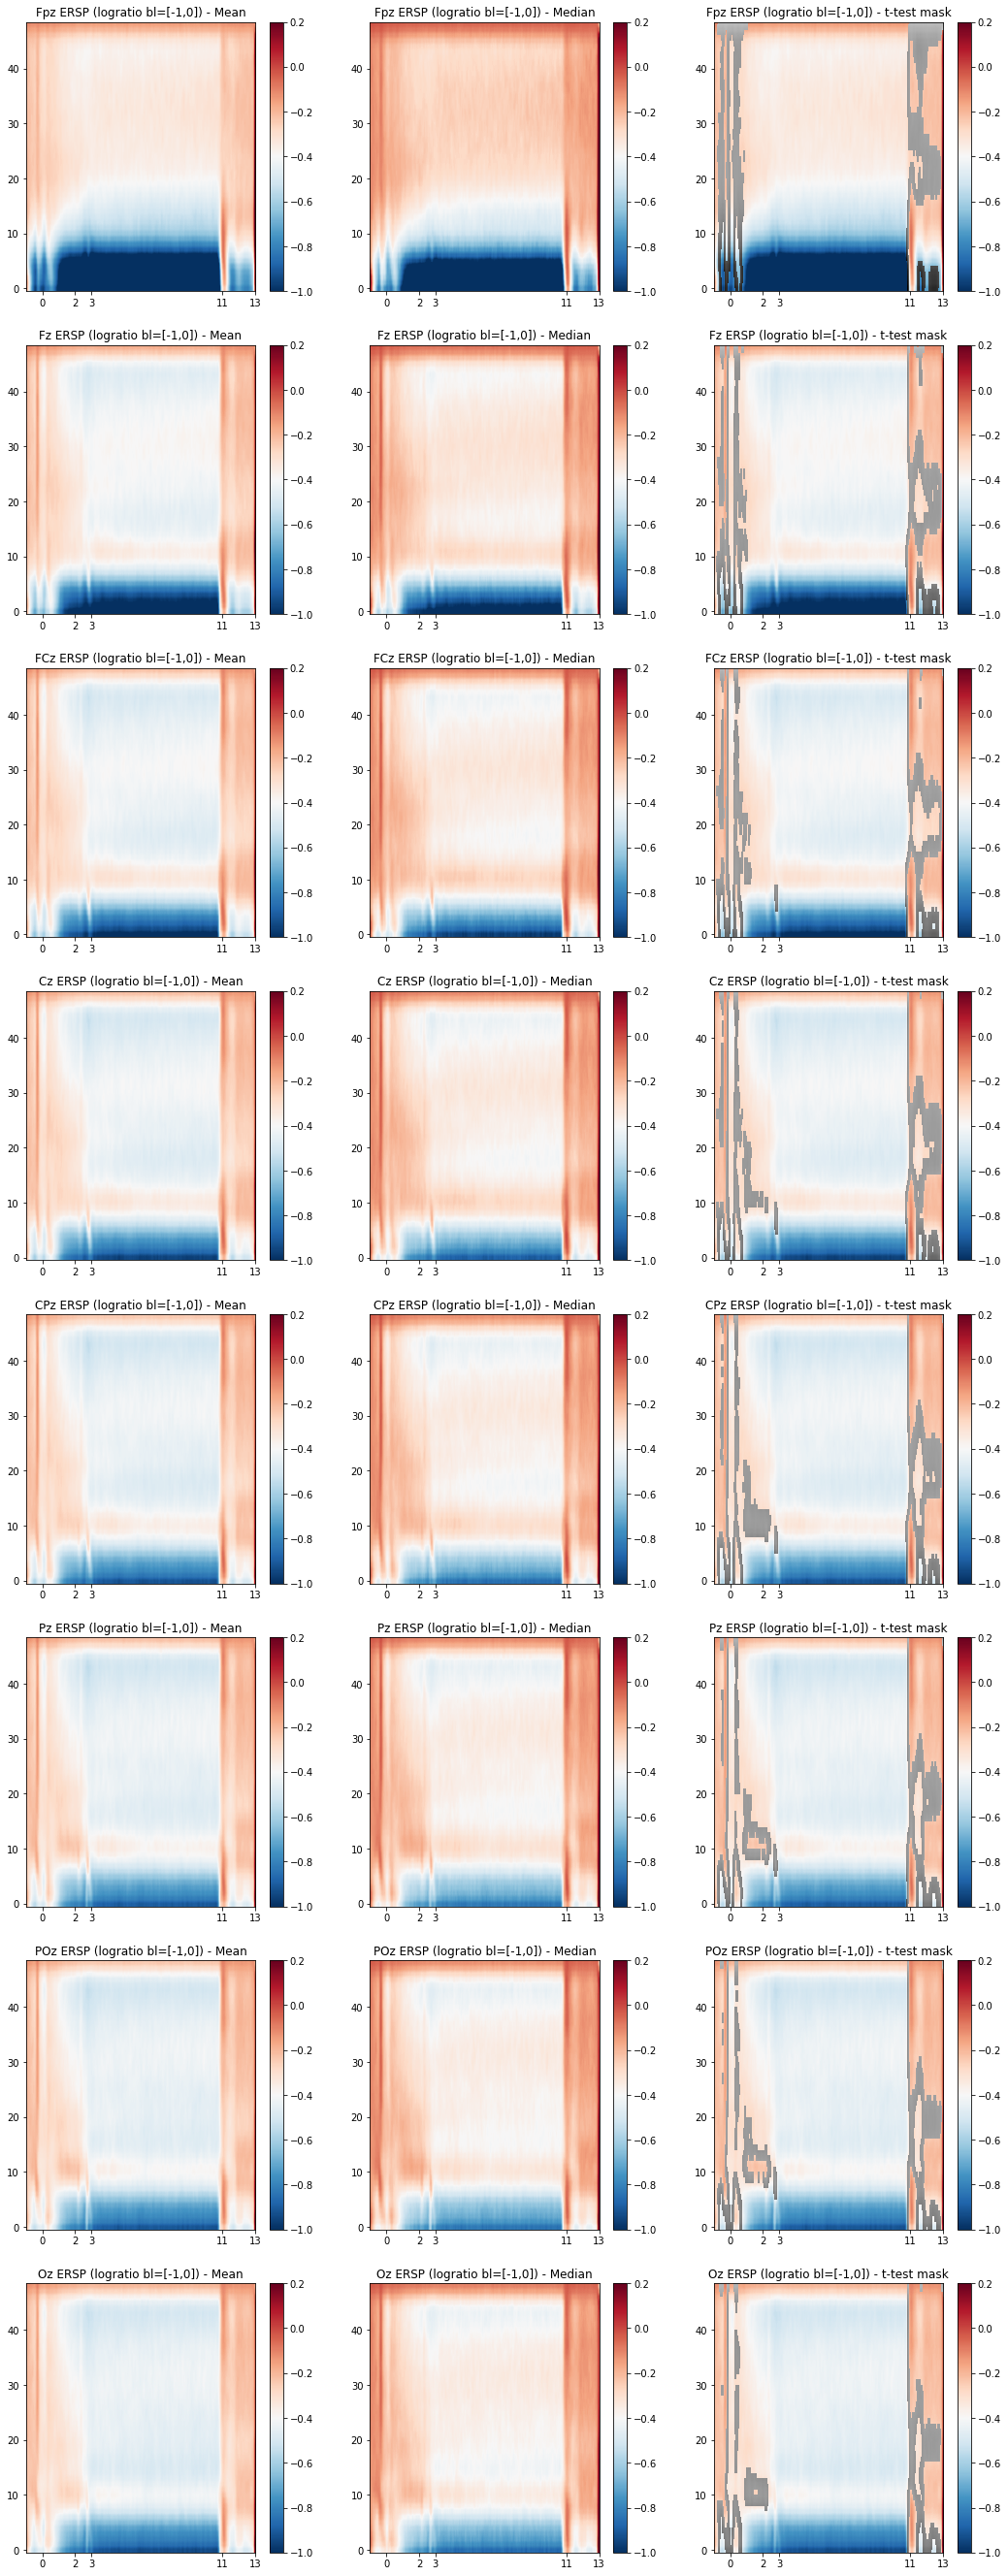

In [39]:
plot_blratio = dict()

for i, ch in enumerate(mid_channels_flat):
    with open(directory_preproc + f'ERSP_1-50Hz\\Analysis\\MidLine-MeanMedianMask-{ch}.pkl', "rb") as f:
        data_pickle = pickle.load(f)
        times = data_pickle['times']
        plot_blratio[ch] = data_pickle['plot_blratio']        

fig, axs = plt.subplots(len(mid_channels_flat), 3, figsize=(18, len(mid_channels_flat) *  6))

for i, ch in enumerate(mid_channels_flat):
    tmask2D = plot_blratio[ch]['tmask']
    power2D_blratio_mean = plot_blratio[ch]['mean']
    power2D_blratio_median = plot_blratio[ch]['median']

    z = axs[i, 0].imshow(power2D_blratio_mean, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.2)
    axs[i, 0].set_xticks(ticks_of_interest)
    axs[i, 0].set_xticklabels(times_of_interest)
    axs[i, 0].set_title(f'{ch} ERSP (logratio bl=[-1,0]) - Mean')
    plt.colorbar(z, ax=axs[i, 0])

    z = axs[i, 1].imshow(power2D_blratio_median, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.2)
    axs[i, 1].set_xticks(ticks_of_interest)
    axs[i, 1].set_xticklabels(times_of_interest)
    axs[i, 1].set_title(f'{ch} ERSP (logratio bl=[-1,0]) - Median')
    plt.colorbar(z, ax=axs[i, 1])
    
    axs[i, 2].imshow(power2D_blratio_mean, cmap=plt.cm.gray, aspect='auto', origin='lower', vmin=-1, vmax=0.2)
    z = axs[i, 2].imshow(tmask2D, cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.2)
    axs[i, 2].set_xticks(ticks_of_interest)
    axs[i, 2].set_xticklabels(times_of_interest)
    axs[i, 2].set_title(f'{ch} ERSP (logratio bl=[-1,0]) - t-test mask')
    plt.colorbar(z, ax=axs[i, 2])
    
plt.show()

#fig.savefig('R2 ERSP - MidLine GA Distribution (Good Trials).png', dpi=300, format='png')

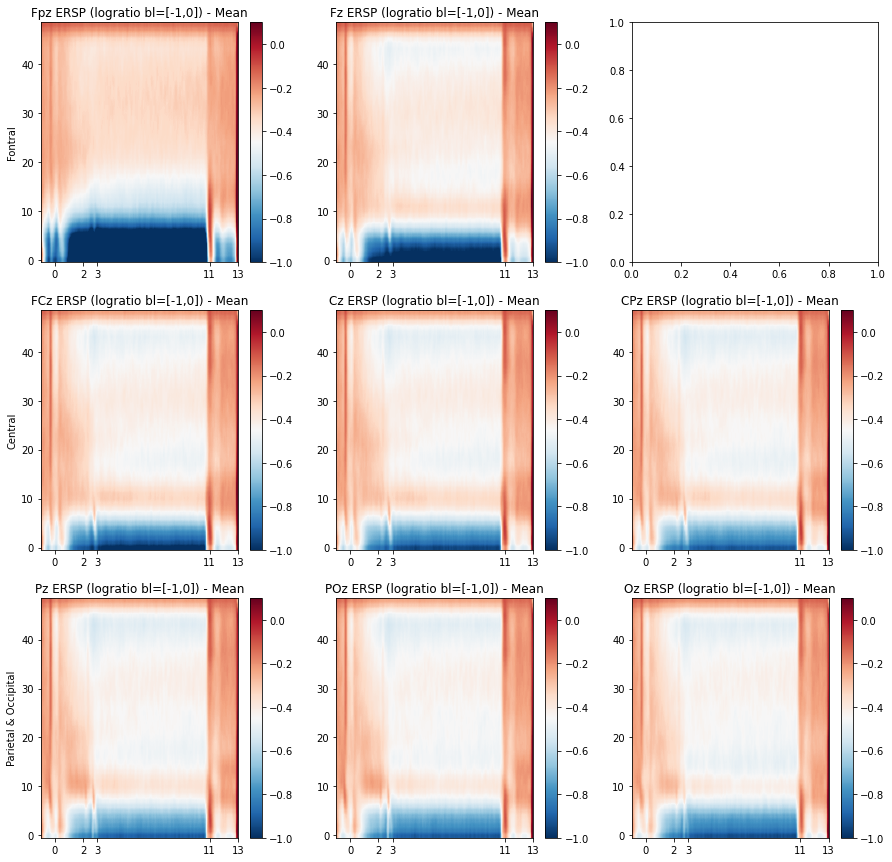

In [41]:
plot_blratio = dict()

for i, ch in enumerate(mid_channels_flat):
    with open(directory_preproc + f'ERSP_1-50Hz\\Analysis\\MidLine-MeanMedianMask-{ch}.pkl', "rb") as f:
        data_pickle = pickle.load(f)
        times = data_pickle['times']
        plot_blratio[ch] = data_pickle['plot_blratio']        
    
mid_channels = [['Fpz', 'Fz'], ['FCz', 'Cz', 'CPz'], ['Pz', 'POz', 'Oz']]
#mid_channels_flat = [ch for cluster in mid_channels for ch in cluster]
ylabel = ['Fontral', 'Central', 'Parietal & Occipital']

# Plot figure
fig, axs = plt.subplots(3, 3, figsize=(15,15))

ticks_offset = np.where(times >= -1)[0][0]
times_of_interest = [0, 2, 3, 11, 13]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]
            
for i, cluster in enumerate(mid_channels):
    for j, channel in enumerate(cluster):
        power2D_blratio_mean = plot_blratio[channel]['mean']
        
        y = axs[i,j].imshow(power2D_blratio_mean, cmap='RdBu_r', aspect='auto', origin='lower', vmin=-1, vmax=0.1)
        axs[i,j].set_xticks(ticks_of_interest)
        axs[i,j].set_xticklabels(times_of_interest)
        axs[i,j].set_title(f'{channel} ERSP (logratio bl=[-1,0]) - Mean')
        plt.colorbar(y, ax=axs[i,j]
                    )
    axs[i, 0].set_ylabel(ylabel[i])
    
plt.show()

fig.savefig('R2a ERSP - MidLine GA Distribution (Bland2020).png', dpi=300, format='png')

# Plot Bland 2020 vs Roy 2022

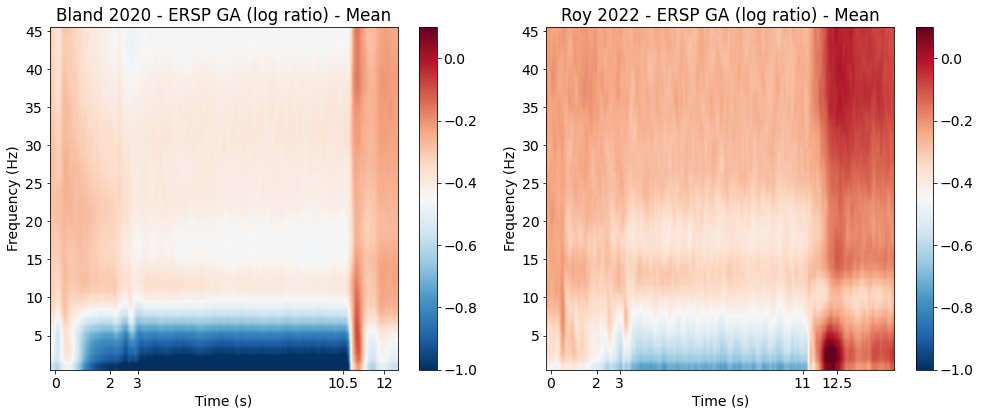

In [7]:
plt.rcParams.update({'font.size':14})
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
yticks = list(range(5, 50, 5))

# ------------------------------------------
# Bland 2020
# ------------------------------------------
bland2020_filepath = directory_preproc + 'ERSP_1-50Hz\\Analysis\\GA-MeanMedianMask.pkl'

with open(bland2020_filepath, "rb") as f:
    data_pickle = pickle.load(f)
            
times = data_pickle['times']
plot_blratio = data_pickle['plot_blratio']
power2D_blratio_mean = plot_blratio['mean']
    
ticks_offset = np.where(times >= -0.2)[0][0]
times_of_interest = [0, 2, 3, 10.5, 12]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]

z = axs[0].imshow(power2D_blratio_mean[:-4,(times >= -0.2) & (times <= 12.5)], cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.1)
axs[0].set_xticks(ticks_of_interest)
axs[0].set_xticklabels(times_of_interest)
axs[0].set_yticks([f-1 for f in yticks]) # 0-based freq array. [0] = 1Hz
axs[0].set_yticklabels(yticks)
axs[0].set_title(f'Bland 2020 - ERSP GA (log ratio) - Mean')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xlabel('Time (s)')
plt.colorbar(z, ax=axs[0])

# ------------------------------------------
# Roy 2022
# ------------------------------------------
roy2022_filepath_power = 'D:\\PhD\\NeuroTracker - Paper\\data\\ERSP_1-50Hz\\R1-GrandAverage.pkl'
roy2022_filepath_time = 'D:\\PhD\\NeuroTracker - Paper\\data\\ERSP_1-50Hz\\times.pkl'

with open(roy2022_filepath_power, "rb") as f:
    power2D_blratio_mean = pickle.load(f)
    
with open(roy2022_filepath_time, "rb") as f:
    times = pickle.load(f)
            
#times = data_pickle['times']
#plot_blratio = data_pickle['plot_blratio']
#power2D_blratio_mean = plot_blratio['mean']

ticks_offset = np.where(times >= -0.2)[0][0]
times_of_interest = [0, 2, 3, 11, 12.5]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]

z = axs[1].imshow(power2D_blratio_mean[:-4,times >= -0.2], cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.1)
axs[1].set_xticks(ticks_of_interest)
axs[1].set_xticklabels(times_of_interest)
axs[1].set_yticks([f-1 for f in yticks]) # 0-based freq array. [0] = 1Hz
axs[1].set_yticklabels(yticks)
axs[1].set_title(f'Roy 2022 - ERSP GA (log ratio) - Mean')
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
plt.colorbar(z, ax=axs[1])

plt.tight_layout()
plt.show()
fig.savefig('D1 ERSP - Bland2020 vs Roy2022.png', dpi=300, format='png')

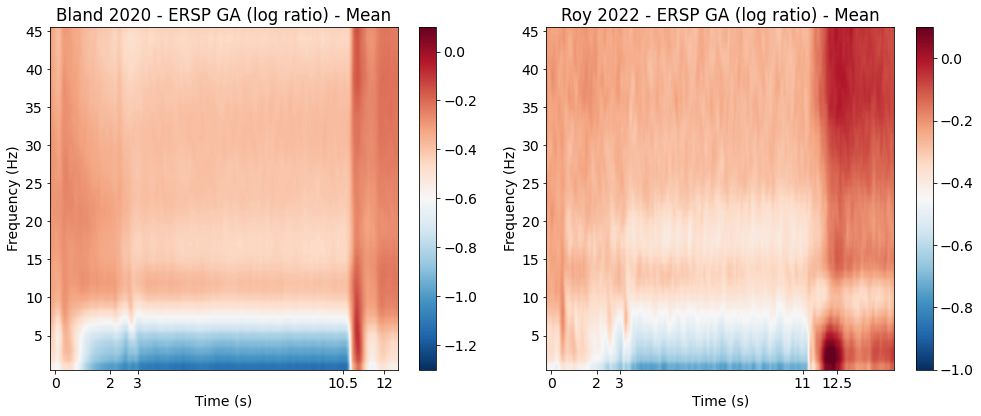

In [29]:
plt.rcParams.update({'font.size':14})
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
yticks = list(range(5, 50, 5))

# ------------------------------------------
# Bland 2020
# ------------------------------------------
bland2020_filepath = directory_preproc + 'ERSP_1-50Hz\\Analysis\\GA-MeanMedianMask.pkl'

with open(bland2020_filepath, "rb") as f:
    data_pickle = pickle.load(f)
            
times = data_pickle['times']
plot_blratio = data_pickle['plot_blratio']
power2D_blratio_mean = plot_blratio['mean']
    
ticks_offset = np.where(times >= -0.2)[0][0]
times_of_interest = [0, 2, 3, 10.5, 12]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]

#z = axs[0].imshow(power2D_blratio_mean[:-4,(times >= -0.2) & (times <= 12.5)], cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1.5, vmax=0.2)
z = axs[0].imshow(power2D_blratio_mean[:-4,(times >= -0.2) & (times <= 12.5)], cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1.3, vmax=0.1)
axs[0].set_xticks(ticks_of_interest)
axs[0].set_xticklabels(times_of_interest)
axs[0].set_yticks([f-1 for f in yticks]) # 0-based freq array. [0] = 1Hz
axs[0].set_yticklabels(yticks)
axs[0].set_title(f'Bland 2020 - ERSP GA (log ratio) - Mean')
axs[0].set_ylabel('Frequency (Hz)')
axs[0].set_xlabel('Time (s)')
plt.colorbar(z, ax=axs[0])

# ------------------------------------------
# Roy 2022
# ------------------------------------------
roy2022_filepath_power = 'D:\\PhD\\NeuroTracker - Paper\\data\\ERSP_1-50Hz\\R1-GrandAverage.pkl'
roy2022_filepath_time = 'D:\\PhD\\NeuroTracker - Paper\\data\\ERSP_1-50Hz\\times.pkl'

with open(roy2022_filepath_power, "rb") as f:
    data_pickle = pickle.load(f)
    
with open(roy2022_filepath_time, "rb") as f:
    times = pickle.load(f)
            
#times = data_pickle['times']
power2D_mean = data_pickle['power2D_mean']

ticks_offset = np.where(times >= -0.2)[0][0]
times_of_interest = [0, 2, 3, 11, 12.5]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]

z = axs[1].imshow(power2D_mean[:-4,times >= -0.2], cmap=plt.cm.RdBu_r, aspect='auto', origin='lower', vmin=-1, vmax=0.1)
axs[1].set_xticks(ticks_of_interest)
axs[1].set_xticklabels(times_of_interest)
axs[1].set_yticks([f-1 for f in yticks]) # 0-based freq array. [0] = 1Hz
axs[1].set_yticklabels(yticks)
axs[1].set_title(f'Roy 2022 - ERSP GA (log ratio) - Mean')
axs[1].set_ylabel('Frequency (Hz)')
axs[1].set_xlabel('Time (s)')
plt.colorbar(z, ax=axs[1])

plt.tight_layout()
plt.show()
fig.savefig('D1 ERSP - Bland2020 vs Roy2022 (b).png', dpi=300, format='png')

In [12]:
len(times)

5889

In [9]:
power2D_blratio_mean

{'times': array([-3.        , -2.99609375, -2.9921875 , ..., 19.9921875 ,
        19.99609375, 20.        ]),
 'power2D_mean': array([[-0.42131559, -0.42195595, -0.42234793, ..., -0.12398311,
         -0.12442486, -0.12501133],
        [-0.36372804, -0.36404363, -0.36398997, ..., -0.06374378,
         -0.06384328, -0.06393907],
        [-0.35132114, -0.35098772, -0.35089292, ..., -0.05477213,
         -0.05392444, -0.05312716],
        ...,
        [-0.20814237, -0.20869555, -0.20943207, ..., -0.0848454 ,
         -0.08416641, -0.08354148],
        [-0.21091287, -0.21062308, -0.21051969, ..., -0.09497854,
         -0.09369684, -0.09280822],
        [-0.21489086, -0.21420251, -0.21334028, ..., -0.10595976,
         -0.10395379, -0.10204141]])}

# V1 - TO BE DELETED

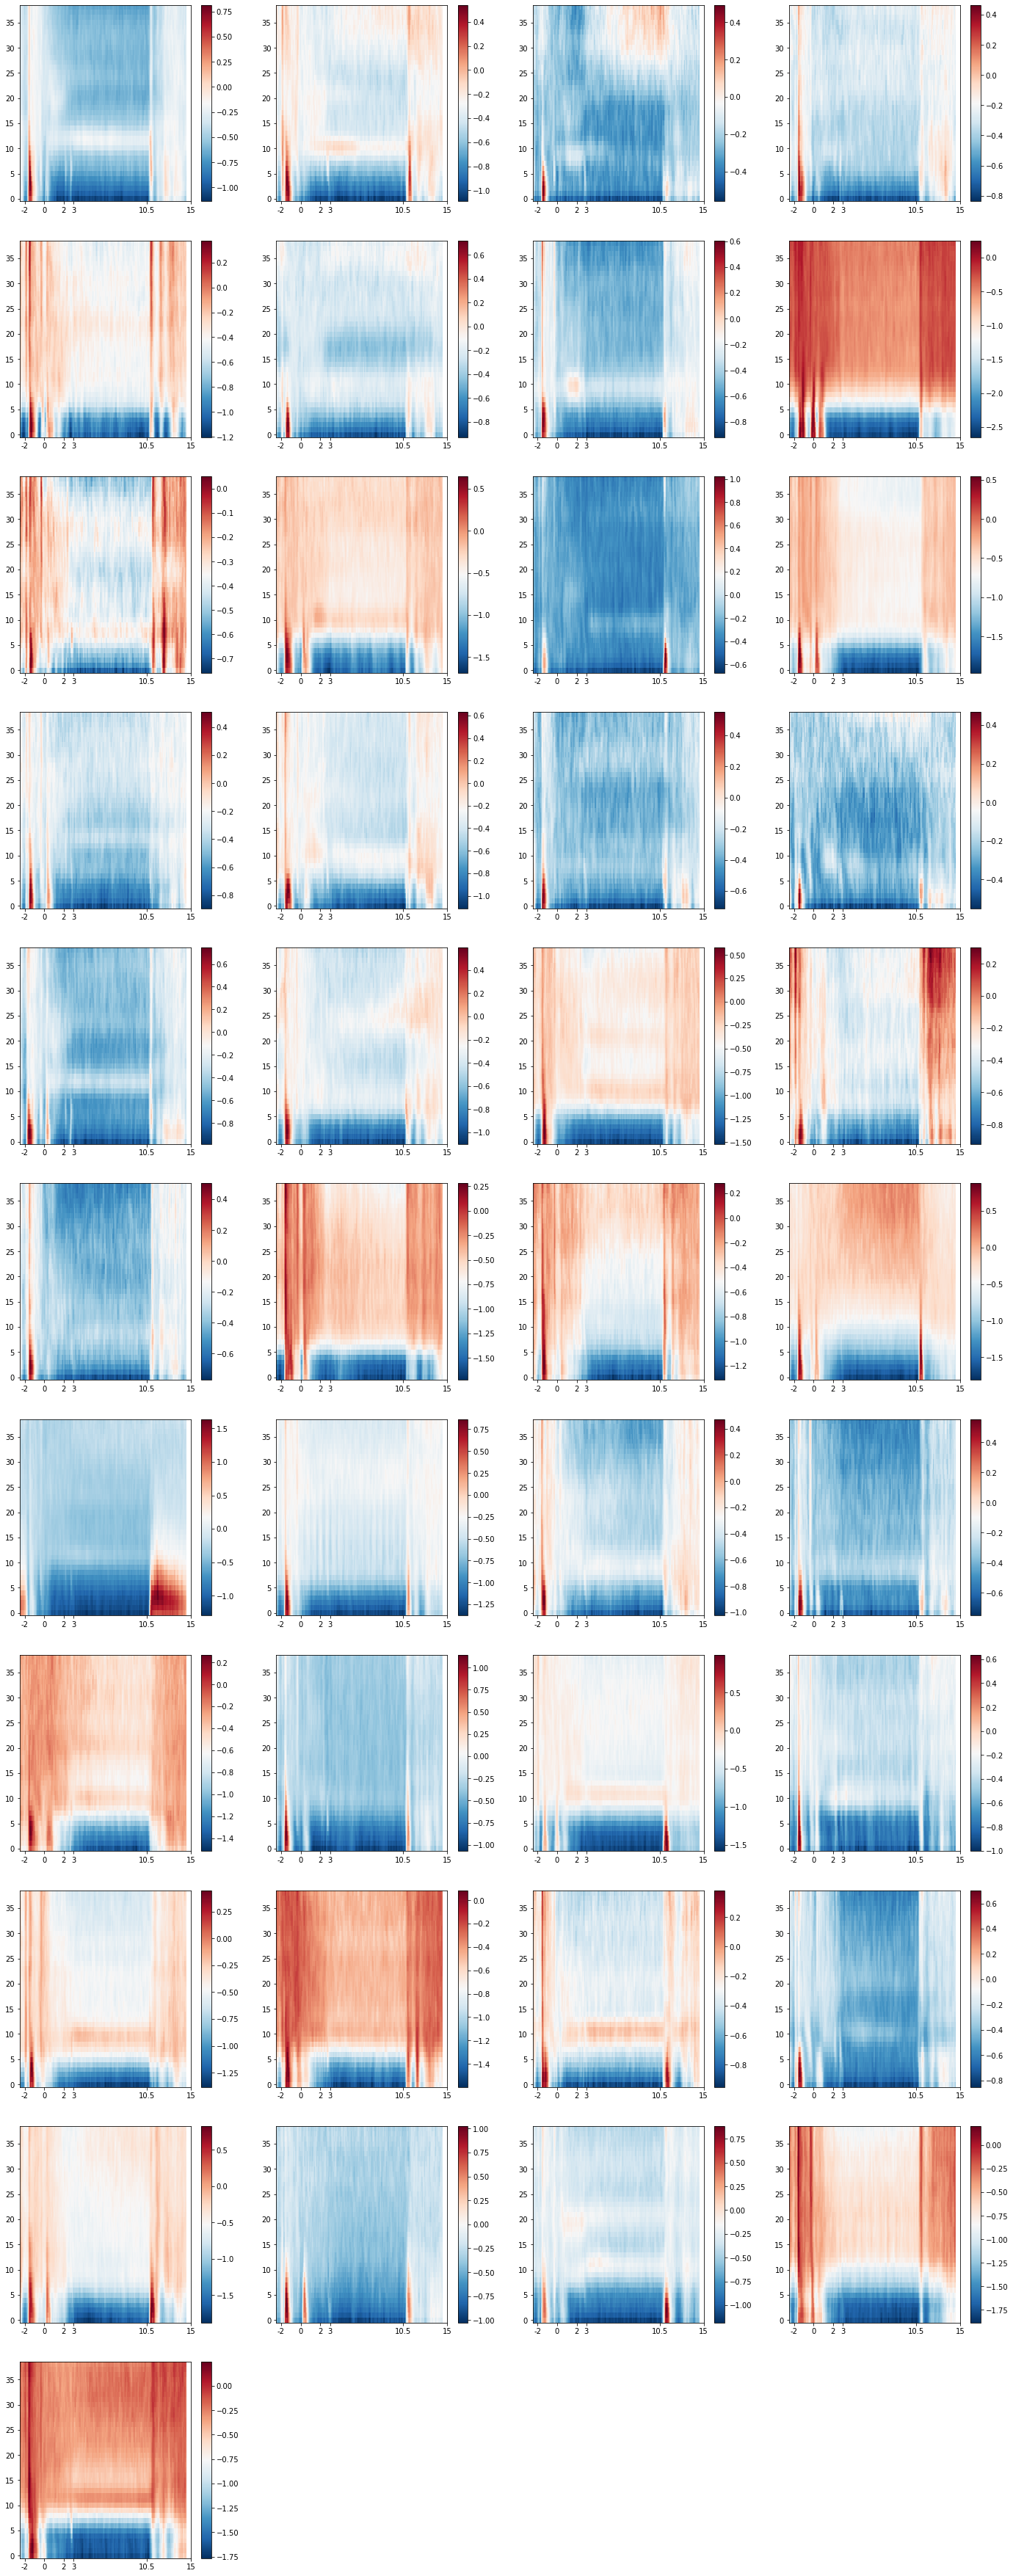

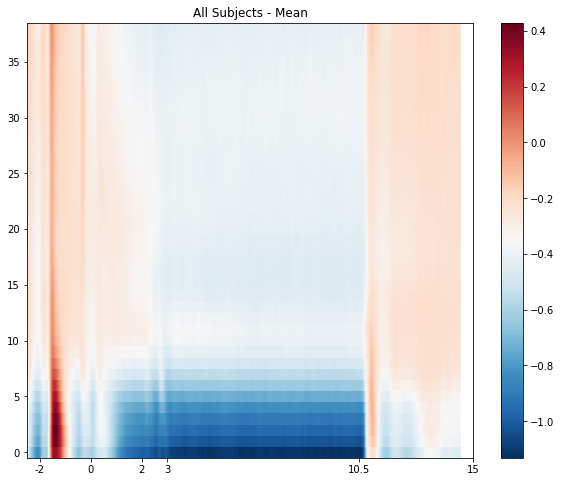

In [11]:
power2D_mean = np.array([])
power2D_stacked = []
for participant in power2D_all.keys():
    power2D_stacked.append(power2D_all[participant])

power2D_stacked = np.stack(power2D_stacked)
power2D_mean = np.mean(power2D_stacked, 0)

ticks_offset = 100 #np.where(power.times > -1)[0][0]
times_of_interest = [-2, 0, 2, 3, 10.5, 15]
ticks_of_interest = [(np.where(times >= t)[0][0] - ticks_offset) for t in times_of_interest]
        
# Show Subject by Subject.
plt.figure(figsize=(24, 64))
for i in range(power2D_stacked.shape[0]):
    ax = plt.subplot(11, 4, i+1)
    z = ax.imshow(power2D_stacked[i, :,100:-100], cmap='RdBu_r', interpolation='nearest', aspect='auto')#, vmin=-0.75, vmax=0.75)
    ax.set_xticks(ticks_of_interest)
    ax.set_xticklabels(times_of_interest)
    ax.invert_yaxis()
    #ax.set_title('Subject')
    plt.colorbar(z, ax=ax)
plt.show()
fig.savefig('Bland2020-RoughFrequencyAnalysis-AllSubjects.png', dpi=300, format='png')

# Show Group Average
fig, ax = plt.subplots(figsize=(10,8))
z = ax.imshow(power2D_mean[:,100:-100], cmap='RdBu_r', interpolation='nearest', aspect='auto')#, vmin=-0.75, vmax=0.75)
ax.set_xticks(ticks_of_interest)
ax.set_xticklabels(times_of_interest)
ax.invert_yaxis()
ax.set_title('All Subjects - Mean')
plt.colorbar(z, ax=ax)
plt.show()

# Tools for Quick Tests

In [8]:
filepath = '/Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1011.vhdr'

#for filepath in glob.iglob(directory_path + '*.bdf'):
file_name = filepath[filepath.rfind('/')+1:]
print('Processing: ' + file_name + '...')

# 1. -- Load File --
raw = read_raw_brainvision(filepath, preload=True)
events = mne.events_from_annotations(raw)

Processing: 1011.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Bland 2020/EEG Data - Raw/1011.vhdr...
Setting channel info structure...
Reading 0 ... 16198499  =      0.000 ...  3239.700 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 51', 'Stimulus/S 52', 'Stimulus/S 62', 'Stimulus/S 63', 'Stimulus/S 64']


In [3]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: AF3, AF4, AF7, AF8, C1, C2, C3, C4, C5, C6, CP1, CP2, CP3, CP4, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2016-01-14 10:48:04 UTC
 nchan: 63
 projs: []
 sfreq: 5000.0 Hz
>

Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB

Using matplotlib as 2D backend.


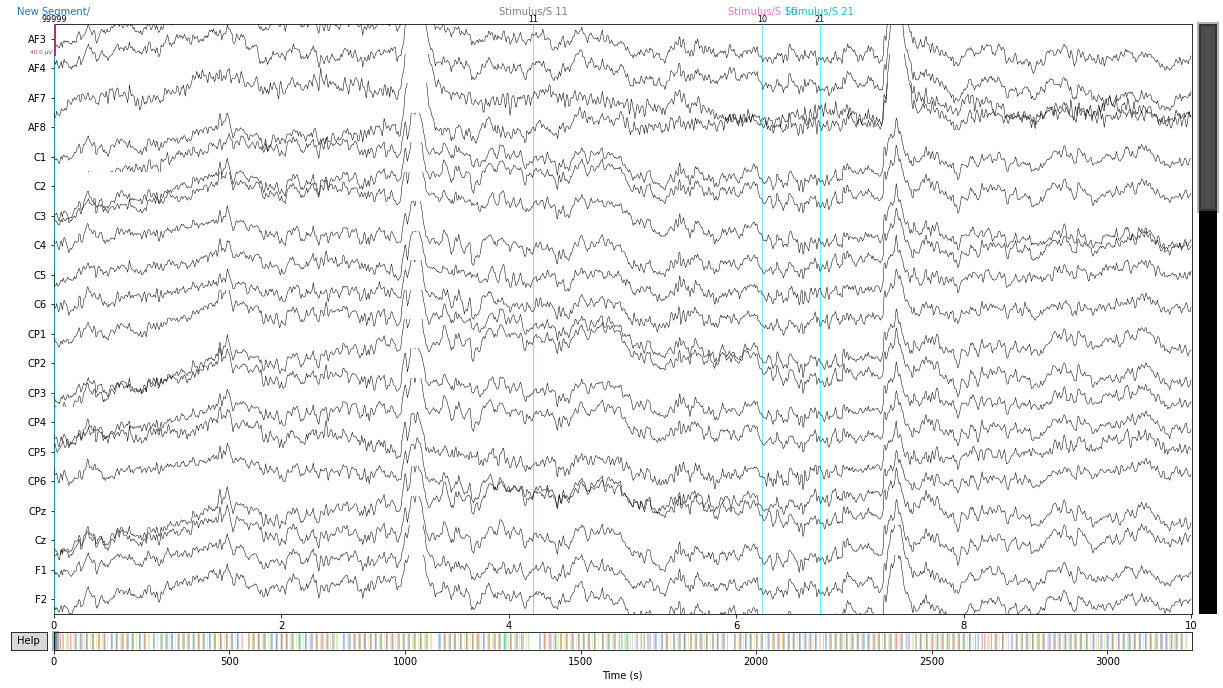

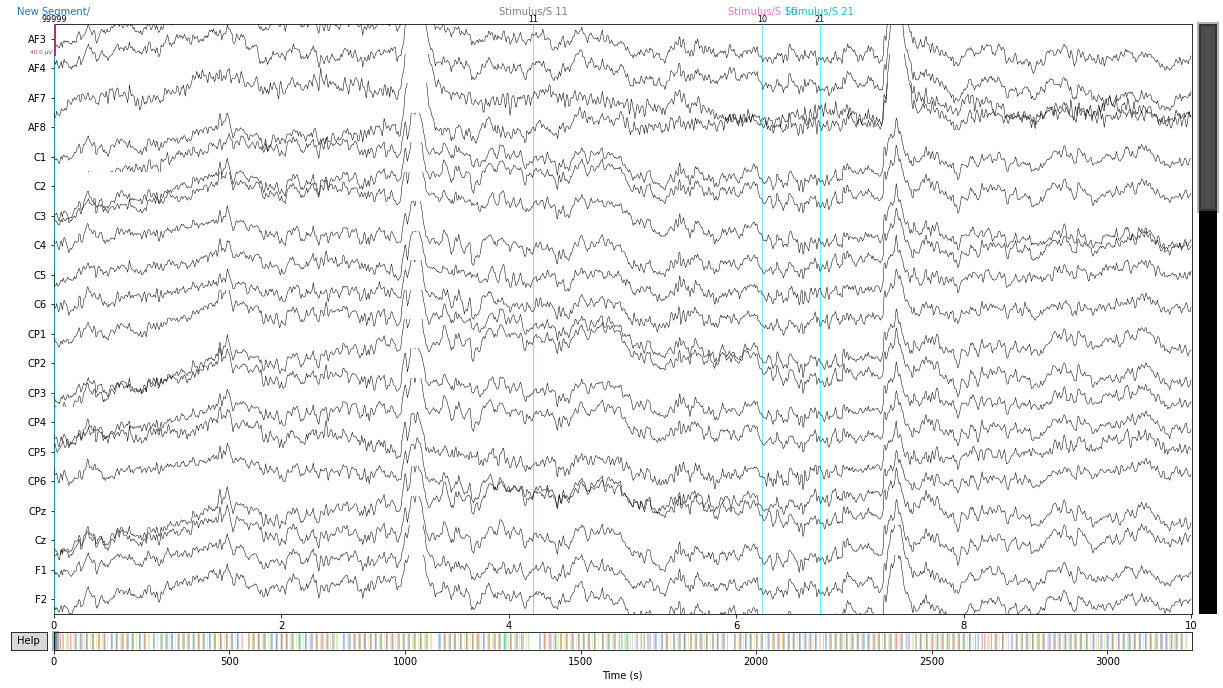

In [9]:
raw.plot(events=events[0], block=True, lowpass=40)

In [11]:
# ---------- Debug Logs ----------
frequency = collections.Counter(events[0][:,2])
events_frequency = dict(frequency)

print('Max Events in File...')
print("---------------------------")
for e in set(events[0][:,2]):
    print("{}: \t\t{}".format(e, frequency[e]))
print("---------------------------")
# ---------- Debug Logs ----------

Max Events in File...
---------------------------
64: 		45
1: 		48
2: 		48
3: 		47
4: 		48
10: 		192
11: 		192
51: 		5
20: 		192
21: 		192
52: 		91
63: 		40
62: 		11
99999: 		3
---------------------------


In [10]:
epochs = Epochs(raw, events[0], event_id=[11], tmin=-1, tmax=15, baseline=(None, None), preload=True, event_repeated='merge', on_missing='warn')


Not setting metadata
Not setting metadata
192 matching events found
Setting baseline interval to [-1.0, 15.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 192 events and 80001 original time points ...
0 bad epochs dropped


In [16]:
epochs

<Epochs |  192 events (all good), -1 - 15 sec, baseline -1 – 15 sec, ~7.21 GB, data loaded,
 '11': 192>

In [27]:
print(epochs)

<Epochs |  192 events (all good), -1 - 15 sec, baseline -1 – 15 sec, ~7.21 GB, data loaded,
 '11': 192>


In [20]:
print(epochs.info.ch_names)

['AF3', 'AF4', 'AF7', 'AF8', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fpz', 'FT7', 'FT8', 'Fz', 'O1', 'O2', 'Oz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO3', 'PO4', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP10', 'TP7', 'TP8', 'TP9', 'Iz', 'FCz']


In [17]:
freqs = np.arange(1, 45, 1)
n_cycles = freqs / 2.  # different number of cycle per frequency

power = tfr_morlet(epochs.copy().pick_channels(['Fpz']), freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, average=False, decim=10, n_jobs=8, verbose=False)
power = power.apply_baseline((-1,0), mode='logratio', verbose=False)   

No baseline correction applied


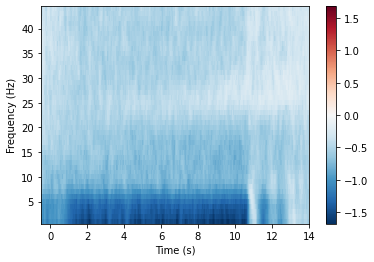

[<Figure size 432x288 with 2 Axes>]

In [19]:
power.crop(tmin=-0.5, tmax=14).average().plot()

In [26]:
power2D = power.data.mean(1)

times = power.times
ticks_offset = 100 #np.where(power.times > -1)[0][0]
times_of_interest = [0, 2, 10.5]
ticks_of_interest = [(np.where(times >= t)[0][0] + ticks_offset) for t in times_of_interest]
    
fig, ax = plt.subplots(figsize=(10,8))
z = ax.imshow(power2D.mean(0), cmap='RdBu_r', interpolation='nearest', aspect='auto')#, vmin=-0.75, vmax=0.75)
ax.invert_yaxis()
ax.set_xticks(ticks_of_interest)
ax.set_xticklabels(times_of_interest)
plt.colorbar(z, ax=ax)
plt.show()